In [1]:
from coba.benchmarks import Result 

In [2]:
result

{'Learners': 5, 'Simulations': 1, 'Interactions': 250000}

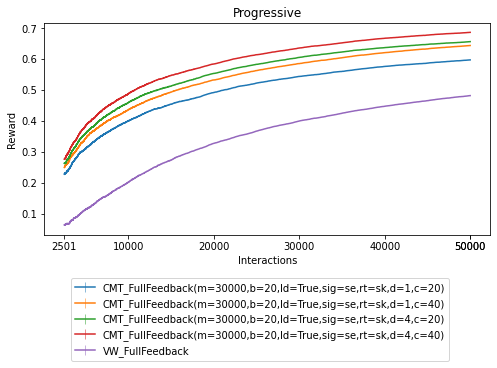

In [4]:
Result.from_file("./outcomes/aloi.log").plot_learners() #learned euclidean distance

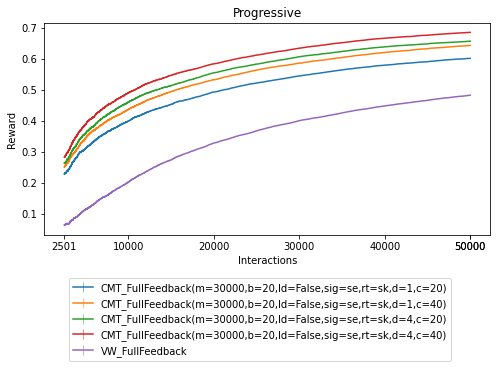

In [5]:
Result.from_file("./outcomes/aloi2.log").plot_learners() #no learned euclidean distance...

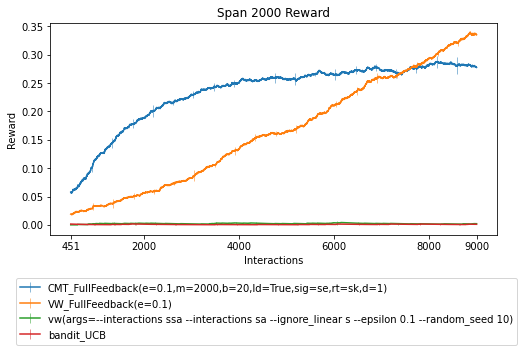

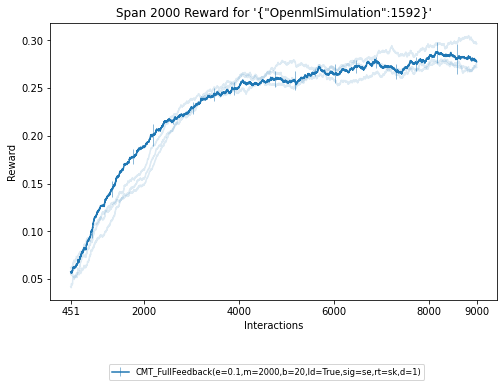

In [16]:
Result.from_file("./outcomes/large.log").plot_learners(1592, span=2000)
Result.from_file("./outcomes/large.log").plot_shuffles(1592, "*CMT*", span=2000)

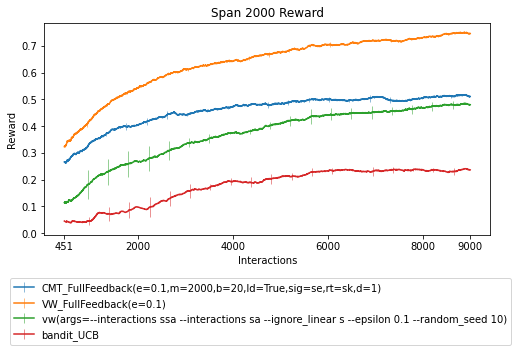

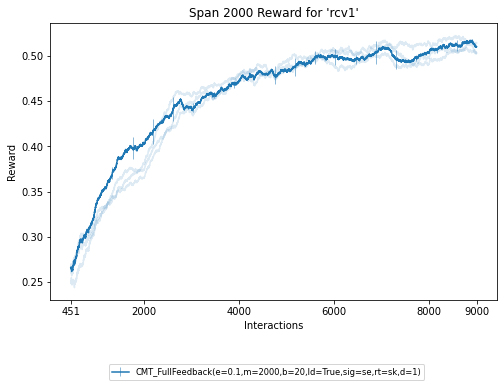

In [15]:
Result.from_file("./outcomes/large.log").plot_learners("rcv1", span=2000)
Result.from_file("./outcomes/large.log").plot_shuffles('rcv1', "*CMT*", span=2000)

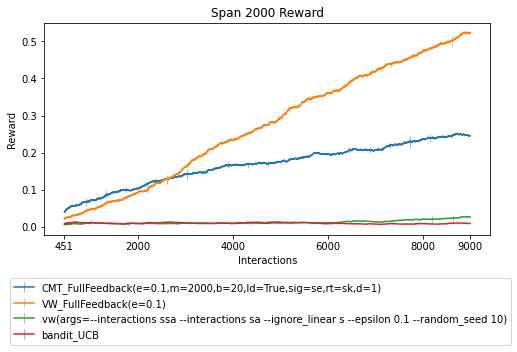

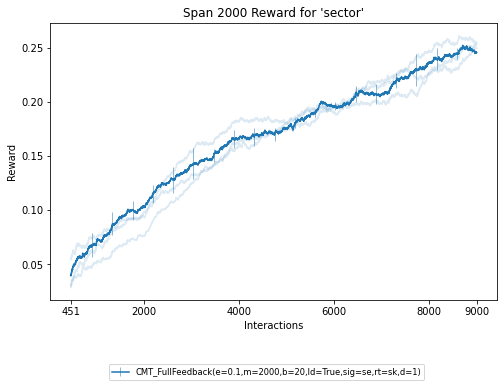

In [18]:
Result.from_file("./outcomes/large.log").plot_learners("sector", span=2000)
Result.from_file("./outcomes/large.log").plot_shuffles('sector', "*CMT*", span=2000)